In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

import warnings
warnings.filterwarnings('ignore')


In [2]:
file = "UCI_Credit_Card.csv"
path = os.getcwd() + '\\' + file
df = pd.read_csv(path, index_col ='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.drop_duplicates(inplace=True)


In [4]:
df["EDUCATION"] = df["EDUCATION"].replace([5,6,0], 4)

In [5]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15945
1    13643
3      377
Name: count, dtype: int64

In [6]:
df.rename(columns={'default.payment.next.month':'IsDefaulter'},inplace=True)

In [7]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [8]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [9]:
X=df.drop(columns=["IsDefaulter"])
y=df["IsDefaulter"]

In [10]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [11]:
X.shape

(29965, 23)

In [12]:
y.shape

(29965,)

In [13]:
y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: IsDefaulter, Length: 29965, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23972, 23), (5993, 23), (23972,), (5993,))

In [17]:
#!pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train )

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 23972
Resampled dataset shape 37336


In [20]:
#!pip install --upgrade imbalanced-learn

In [21]:
y_smote.value_counts()

IsDefaulter
1    18668
0    18668
Name: count, dtype: int64

In [22]:
# from imblearn.combine import SMOTETomek
# smote = SMOTETomek(random_state = 42)

# # fit predictor and target variable
# X_smote, y_smote = smote.fit_resample(X_train, y_train )

# print('Original dataset shape', len(X_train))
# print('Resampled dataset shape', len(y_smote))


In [23]:
X_smote.shape, y_smote.shape

((37336, 23), (37336,))

In [24]:
X_smote.shape, y_smote.shape, X_test.shape, y_test.shape

((37336, 23), (37336,), (5993, 23), (5993,))

In [25]:
X_smote

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,180000.0,1,1,2,27,-2,-1,2,2,-2,...,14040.000000,13440.000000,13440.000000,13080.000000,3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,200000.0,2,2,1,27,1,3,2,2,2,...,182657.000000,174547.000000,181454.000000,177141.000000,5200.000000,7000.000000,0.000000,13300.000000,0.000000,6200.000000
2,20000.0,2,3,1,56,0,0,0,0,0,...,12115.000000,12356.000000,12623.000000,13905.000000,1188.000000,1201.000000,442.000000,466.000000,1500.000000,421.000000
3,120000.0,2,2,2,26,-1,-1,-1,-1,-1,...,3858.000000,6849.000000,2616.000000,2805.000000,216.000000,3858.000000,6849.000000,2616.000000,2805.000000,3926.000000
4,30000.0,1,1,2,30,0,0,0,0,0,...,28076.000000,25991.000000,25429.000000,26234.000000,1780.000000,1752.000000,1666.000000,800.000000,1161.000000,3128.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37331,360000.0,1,1,1,31,-1,-1,-1,-2,-2,...,0.000000,0.000000,0.000000,0.000000,450.782140,0.000000,0.000000,0.000000,0.000000,0.000000
37332,100000.0,1,3,1,50,-1,-1,0,0,-1,...,390.000000,127.050307,652.949693,127.050307,652.949693,127.050307,127.050307,652.949693,127.050307,127.050307
37333,50000.0,1,2,1,22,0,0,0,0,0,...,19800.305258,18764.295929,17975.088736,18480.691444,1367.379101,1489.958519,738.132205,655.364019,986.060561,992.839619
37334,200000.0,1,1,1,38,2,2,2,2,2,...,2500.000000,2500.000000,2500.000000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
# onehotecoded = ohe.fit_transform(X_smote[['EDUCATION']])
# pd.DataFrame(onehotecoded, columns= ohe.get_feature_names_out(['EDUCATION']))
# ohe.transform()
#onehotecoded
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform()
# scaler.transform()

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

def create_custom_pipeline(categorical_cols, numerical_cols, scaling_method='None'):
    # Define transformers for categorical and numerical columns
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop="first", handle_unknown='ignore'))])

    if scaling_method:
        if scaling_method == 'standard':
            numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        elif scaling_method == 'robust':
            numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])
        elif scaling_method == 'minmax':
            numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    else:
        numerical_transformer = "passthrough"

    # Specify which columns to apply each transformer to
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Include the preprocessor in your main pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    return pipeline

In [31]:
cat_cols = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
num_cols = [col for col in X_smote.columns if col not in cat_cols]

In [32]:
pipeline1 = create_custom_pipeline(categorical_cols=cat_cols, numerical_cols=num_cols, scaling_method='standard')

In [33]:
pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT_SEPT',
                                                   'BILL_AMT_AUG',
                                                   'BILL_AMT_JUL',
                                                   'BILL_AMT_JUN',
                                                   'BILL_AMT_MAY',
                                                   'BILL_AMT_APR',
                                                   'PAY_AMT_SEPT',
                                                   'PAY_AMT_AUG', 'PAY_AMT_JUL',
                                                   'PAY_AMT_JUN', 'PAY_AMT_MAY',
                                                   'PAY_AMT_APR']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_SEPT',
                                                   'PAY_AUG', 'PAY_JUL',
                                                   'PAY_JUN', 'PAY_MAY',
                                                   'PAY_APR'])]))])

In [34]:
X_smote.shape, y_smote.shape, X_test.shape, y_test.shape

((37336, 23), (37336,), (5993, 23), (5993,))

In [35]:
X_transformed_train =  pipeline1.fit_transform(X_smote)
X_transformed_test = pipeline1.transform(X_test)

In [36]:
X_transformed_train.shape, y_smote.shape,X_transformed_test.shape,X_smote.shape

((37336, 79), (37336,), (5993, 79), (37336, 23))

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,roc_curve,auc


In [39]:
def evaluate_model(model, X_train, X_test, y_train, y_test, hyperparameters={}):
    """
    Evaluate a machine learning model with hyperparameters.

    Parameters:
    - model: The machine learning model to be trained and evaluated.
    - X_train: Features of the training set.
    - X_test: Features of the testing set.
    - y_train: Target labels of the training set.
    - y_test: Target labels of the testing set.
    - hyperparameters: Dictionary of hyperparameters for the model.

    Returns:
    - A dictionary containing evaluation metrics for both training and testing sets, as well as predicted labels.
    """
    # Initialize and configure the model with hyperparameters
#     model.set_params(**hyperparameters)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_score = roc_auc_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_score = roc_auc_score(y_test, y_test_pred)

    # Create a dictionary to store the results
    evaluation_results = {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1 Score': train_f1,
        'Train ROC AUC Score': train_roc_score,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1,
        'Test ROC AUC Score': test_roc_score,
        'y_pred_train': y_train_pred,
        'y_pred_test': y_test_pred,
        'Trained_model':model
    }

    return evaluation_results

In [40]:
#select the model
lr_model = LogisticRegression()

In [41]:
result_lr = evaluate_model(model=lr_model, X_train=X_transformed_train, X_test=X_transformed_test, y_train=y_smote, y_test=y_test)

In [42]:
result_lr

{'Train Accuracy': 0.7519016498821512,
 'Train Precision': 0.7880904245543099,
 'Train Recall': 0.6890936361688451,
 'Train F1 Score': 0.7352747849447001,
 'Train ROC AUC Score': 0.7519016498821514,
 'Test Accuracy': 0.759886534290005,
 'Test Precision': 0.46132785763175904,
 'Test Recall': 0.5082956259426847,
 'Test F1 Score': 0.4836742016505203,
 'Test ROC AUC Score': 0.6698324069289169,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'Trained_model': LogisticRegression()}

In [43]:
result_lr['Trained_model']

LogisticRegression()

[[15186  3482]
 [ 5811 12857]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

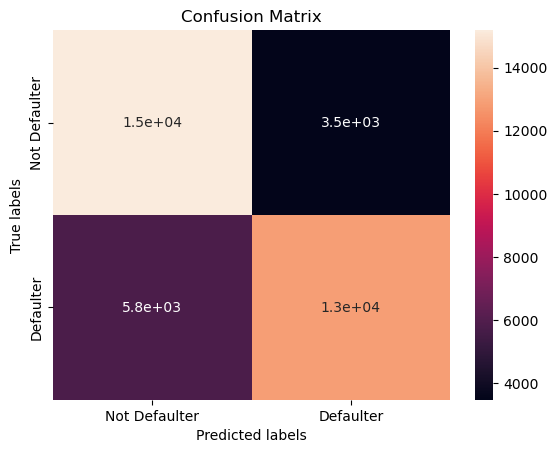

In [83]:
# Get the confusion matrix for train
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_smote, result_lr['y_pred_train'])
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3883  784]
 [ 650  676]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

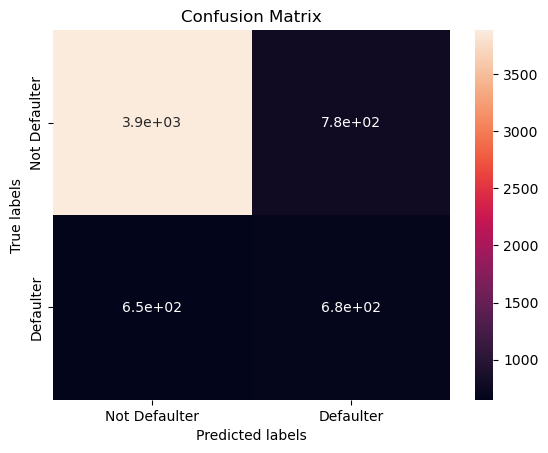

In [84]:
# Get the confusion matrix for test
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, result_lr['y_pred_test'])
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [44]:
dt_model = DecisionTreeClassifier()
result_dt = evaluate_model(model=dt_model, X_train=X_transformed_train, X_test=X_transformed_test, y_train=y_smote, y_test=y_test)

In [45]:
result_dt

{'Train Accuracy': 0.9993839725733876,
 'Train Precision': 0.9996784048882457,
 'Train Recall': 0.99908935076066,
 'Train F1 Score': 0.9993837910247823,
 'Train ROC AUC Score': 0.9993839725733876,
 'Test Accuracy': 0.6824628733522443,
 'Test Precision': 0.34563937934724454,
 'Test Recall': 0.48717948717948717,
 'Test F1 Score': 0.40438184663536775,
 'Test ROC AUC Score': 0.612563388329405,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([1, 0, 0, ..., 1, 0, 1], dtype=int64),
 'Trained_model': DecisionTreeClassifier()}

In [46]:
result_lr

{'Train Accuracy': 0.7509374330404971,
 'Train Precision': 0.7867066527939286,
 'Train Recall': 0.6885579601457039,
 'Train F1 Score': 0.7343674122318393,
 'Train ROC AUC Score': 0.7509374330404971,
 'Test Accuracy': 0.7588853662606374,
 'Test Precision': 0.45927446954141,
 'Test Recall': 0.5060331825037707,
 'Test F1 Score': 0.48152134912091854,
 'Test ROC AUC Score': 0.6683797795955752,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'Trained_model': LogisticRegression()}

In [47]:
rf_model = RandomForestClassifier()
result_rf = evaluate_model(model=rf_model, X_train=X_transformed_train, X_test=X_transformed_test, y_train=y_smote, y_test=y_test)

In [48]:
result_rf

{'Train Accuracy': 0.9993839725733876,
 'Train Precision': 0.9990898870389208,
 'Train Recall': 0.9996785943861153,
 'Train F1 Score': 0.9993841540150482,
 'Train ROC AUC Score': 0.9993839725733876,
 'Test Accuracy': 0.796929751376606,
 'Test Precision': 0.5470232959447799,
 'Test Recall': 0.4781297134238311,
 'Test F1 Score': 0.510261569416499,
 'Test ROC AUC Score': 0.6828188742820891,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Trained_model': RandomForestClassifier()}

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
em_model=GradientBoostingClassifier()
result_gb = evaluate_model(model=em_model, X_train=X_transformed_train, X_test=X_transformed_test, y_train=y_smote, y_test=y_test)

In [88]:
result_gb

{'Train Accuracy': 0.782033426183844,
 'Train Precision': 0.8155718053224646,
 'Train Recall': 0.7288943646882365,
 'Train F1 Score': 0.7698008599230595,
 'Train ROC AUC Score': 0.782033426183844,
 'Test Accuracy': 0.769731353245453,
 'Test Precision': 0.4809052333804809,
 'Test Recall': 0.5128205128205128,
 'Test F1 Score': 0.49635036496350365,
 'Test ROC AUC Score': 0.6777730162131276,
 'y_pred_train': array([0, 1, 0, ..., 1, 0, 0], dtype=int64),
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'Trained_model': GradientBoostingClassifier()}

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ada_model=AdaBoostClassifier()
result_ab = evaluate_model(model=ada_model, X_train=X_transformed_train, X_test=X_transformed_test, y_train=y_smote, y_test=y_test)

In [54]:
result_ab

{'Train Accuracy': 0.7606063852581958,
 'Train Precision': 0.787359716479622,
 'Train Recall': 0.7140561388472252,
 'Train F1 Score': 0.7489184785662115,
 'Train ROC AUC Score': 0.7606063852581959,
 'Test Accuracy': 0.759886534290005,
 'Test Precision': 0.4625579854208085,
 'Test Recall': 0.526395173453997,
 'Test F1 Score': 0.4924162257495591,
 'Test ROC AUC Score': 0.6763109357734951,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'Trained_model': AdaBoostClassifier()}

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
KNN_model=KNeighborsClassifier()
result_knn = evaluate_model(model=KNN_model, X_train=X_transformed_train, X_test=X_transformed_test, y_train=y_smote, y_test=y_test)

In [57]:
result_knn

{'Train Accuracy': 0.8510552817655882,
 'Train Precision': 0.8389098619227388,
 'Train Recall': 0.8689736447396614,
 'Train F1 Score': 0.8536771477437178,
 'Train ROC AUC Score': 0.8510552817655882,
 'Test Accuracy': 0.7064909060570665,
 'Test Precision': 0.3778905809362662,
 'Test Recall': 0.5052790346907994,
 'Test F1 Score': 0.4323975475959987,
 'Test ROC AUC Score': 0.63446938664045,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Trained_model': KNeighborsClassifier()}

In [58]:
dt_model = DecisionTreeClassifier()
result_dt_noscal = evaluate_model(model=dt_model, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test)

In [59]:
result_dt_noscal

{'Train Accuracy': 0.9994107563745447,
 'Train Precision': 0.9995177882554651,
 'Train Recall': 0.9993036211699164,
 'Train F1 Score': 0.9994106932390443,
 'Train ROC AUC Score': 0.9994107563745447,
 'Test Accuracy': 0.6909728016018688,
 'Test Precision': 0.3512443438914027,
 'Test Recall': 0.4683257918552036,
 'Test F1 Score': 0.4014221073044602,
 'Test ROC AUC Score': 0.6112788162190096,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Trained_model': DecisionTreeClassifier()}

In [61]:
!pip install dill

In [56]:
import dill
logistic_model = result_lr['Trained_model']
pipeline = pipeline1
data = {"model": logistic_model, "pipeline":pipeline}
with open ('model_pipeline_object.joblib','wb') as file:
    dill.dump(data, file)

pipeline1

In [47]:
pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT_SEPT',
                                                   'BILL_AMT_AUG',
                                                   'BILL_AMT_JUL',
                                                   'BILL_AMT_JUN',
                                                   'BILL_AMT_MAY',
                                                   'BILL_AMT_APR',
                                                   'PAY_AMT_SEPT',
                                                   'PAY_AMT_AUG', 'PAY_AMT_JUL',
                                                   'PAY_AMT_JUN', 'PAY_AMT_MAY',
                                                   'PAY_AMT_APR']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_SEPT',
                                                   'PAY_AUG', 'PAY_JUL',
                                                   'PAY_JUN', 'PAY_MAY',
                                                   'PAY_APR'])]))])

In [55]:
def plot_confusion_matrix(y_true, y_pred, labels = ['Not Defaulter', 'Defaulter']):
    """
    Plots a confusion matrix using seaborn.
    
    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        labels: List of class labels.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    # Add labels and title
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    
    # Display the plot
    plt.show()

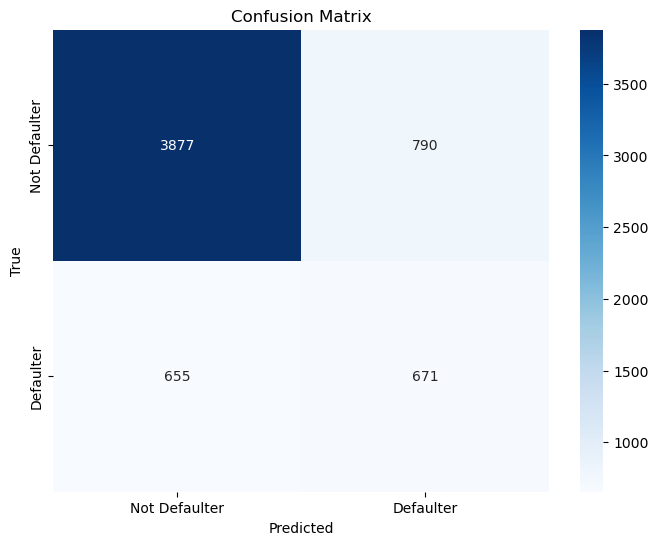

In [60]:
plot_confusion_matrix(y_test,result_lr['y_pred_test'])

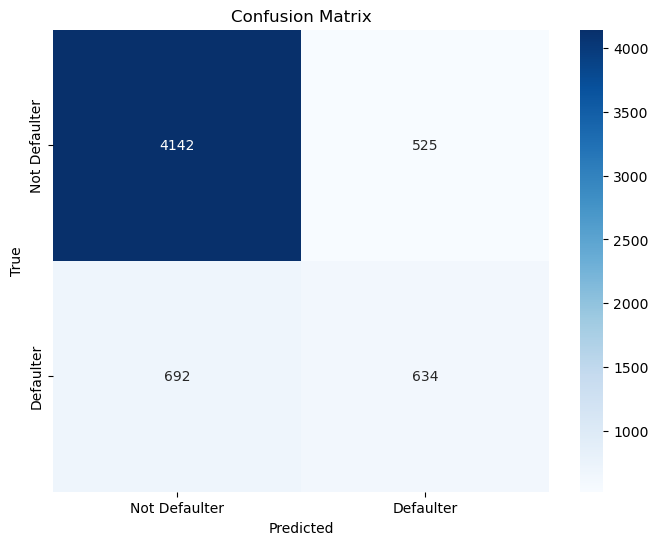

In [61]:
plot_confusion_matrix(y_test,result_rf['y_pred_test'])

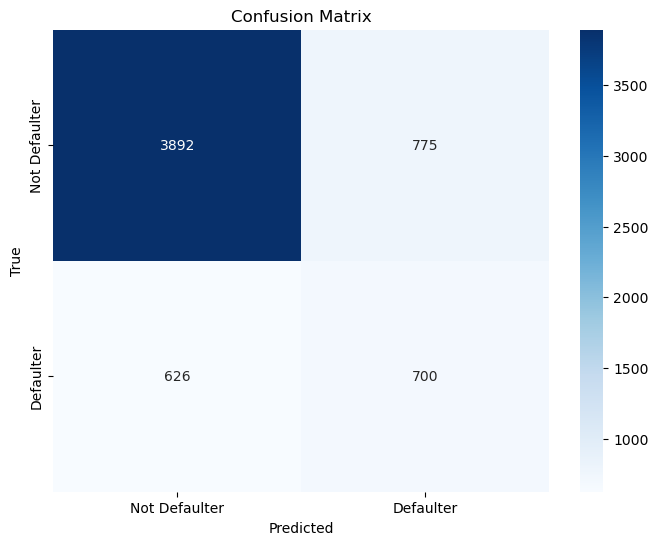

In [62]:
plot_confusion_matrix(y_test,result_gb['y_pred_test'])

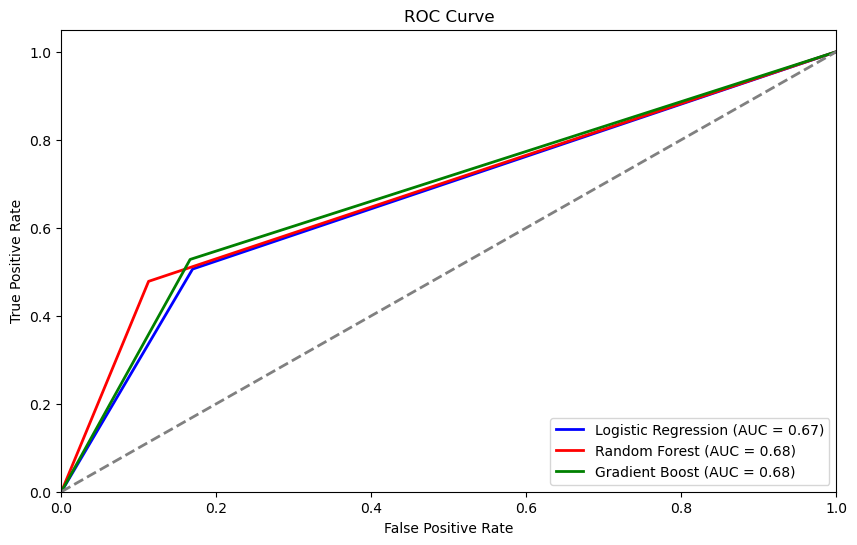

In [65]:
fpr1, tpr1, _ = roc_curve(y_test, result_lr['y_pred_test'])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, result_rf['y_pred_test'])
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, result_gb['y_pred_test'])
roc_auc3 = auc(fpr3, tpr3)

# Repeat the above steps for model3 and its ROC curve and AUC score
plt.figure(figsize=(10, 6))

plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='g', lw=2, label=f'Gradient Boost (AUC = {roc_auc3:.2f})')

# Plot the ROC curve for model3 with its AUC score

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Hyper parameter tuning

In [48]:
pipeline = create_custom_pipeline(cat_cols, num_cols,scaling_method='robust')

# Fit and transform the data
X_preprocessed_train = pipeline.fit_transform(X_smote)
X_preprocessed_test = pipeline.transform(X_test)

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:

#Applying GridSeachCV method

param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4, cv = 5)
grid_lr_clf.fit(X_preprocessed_train, y_smote)
optimized_clf = grid_lr_clf.best_estimator_
optimized_params = grid_lr_clf.best_params_

"\n#Applying GridSeachCV method\n\nparam_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'sag', 'saga']}\ngrid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4, cv = 5)\ngrid_lr_clf.fit(X_preprocessed_train, y_smote)\noptimized_clf = grid_lr_clf.best_estimator_\noptimized_params = grid_lr_clf.best_params_\n"

## LOGISTIC REGRESSION

In [70]:
#Applying RandomSearchCV method


param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
random_lr_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, scoring='accuracy', n_jobs=-1, verbose=4, cv=5, n_iter=100)
random_lr_clf.fit(X_preprocessed_train, y_smote)
optimized_clf = random_lr_clf.best_estimator_
optimized_params = random_lr_clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [71]:
#Applying Hyperparameter tuning  on Logistic Regression

logistic_model = LogisticRegression()
hp = optimized_params
result_lrh = evaluate_model(model=logistic_model, X_train=X_preprocessed_train, X_test=X_preprocessed_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
result_lrh

{'Train Accuracy': 0.7505892436254553,
 'Train Precision': 0.7853482981578627,
 'Train Recall': 0.6896828797943004,
 'Train F1 Score': 0.7344133249672009,
 'Train ROC AUC Score': 0.7505892436254553,
 'Test Accuracy': 0.7593859502753212,
 'Test Precision': 0.46075778078484436,
 'Test Recall': 0.5135746606334841,
 'Test F1 Score': 0.4857346647646219,
 'Test ROC AUC Score': 0.6714005722280342,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'Trained_model': LogisticRegression()}

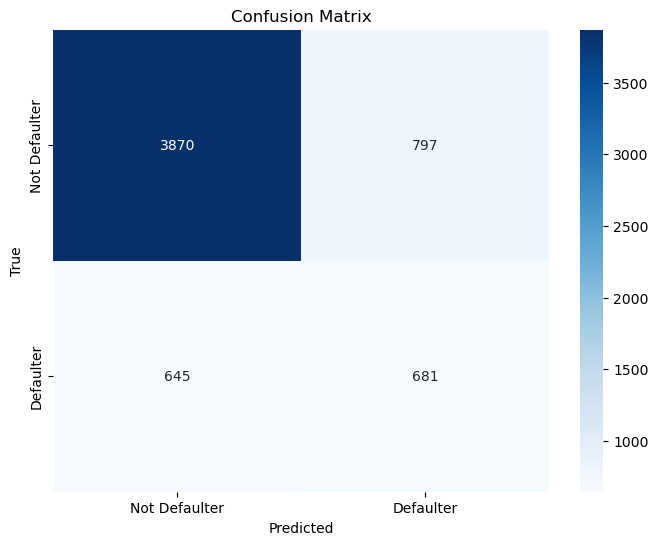

In [79]:
plot_confusion_matrix(y_test,result_lrh['y_pred_test'])

## RANDOM FOREST

In [51]:
from scipy.stats import randint,uniform

In [75]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': randint(1, 20),      # Maximum depth of each tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
    'bootstrap': [True, False],  # Whether or not to use bootstrap samples
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    scoring='accuracy',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Set to 1 for progress updates
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_smote, y_smote)

# Get the best hyperparameters
RF_best_params = random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [76]:
#Applying Hyperparameter tuning  on Random Forest

random_forest_model = RandomForestClassifier(random_state=42)
hyper_parameter = RF_best_params
result_rfh = evaluate_model(model=random_forest_model, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test, hyperparameters=hyper_parameter)
result_rfh

{'Train Accuracy': 0.9993839725733876,
 'Train Precision': 0.9991967871485944,
 'Train Recall': 0.999571459181487,
 'Train F1 Score': 0.9993840880486303,
 'Train ROC AUC Score': 0.9993839725733876,
 'Test Accuracy': 0.7910896045386284,
 'Test Precision': 0.5299352750809061,
 'Test Recall': 0.4939668174962293,
 'Test F1 Score': 0.511319281811085,
 'Test ROC AUC Score': 0.6847378548591068,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Trained_model': RandomForestClassifier(random_state=42)}

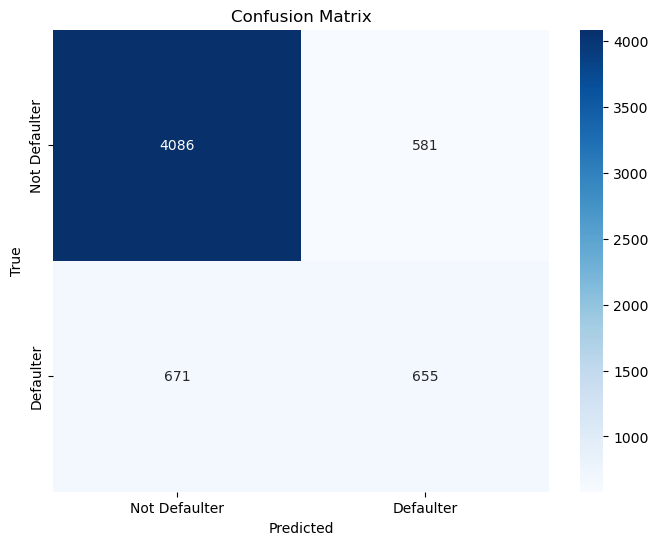

In [81]:
plot_confusion_matrix(y_test,result_rfh['y_pred_test'])

## GRADIENT BOOST


In [52]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': randint(1, 10),      # Maximum depth of each tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 0.5, 1.0],  # Number of features to consider for splitting
    'learning_rate': uniform(0.01,0.1), 
    'loss': ['deviance', 'exponential']
}

# Create a Random Forest classifier
gb_classifier = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_classifier, param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    scoring='accuracy',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Set to 1 for progress updates
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_smote, y_smote)

# Get the best hyperparameters
gb_best_params = random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [53]:
#Applying Hyperparameter tuning  on Gradient boosting classifier

gb_model = GradientBoostingClassifier()
hyper_parameter = gb_best_params
result_gbh = evaluate_model(model=gb_model, X_train=X_preprocessed_train, X_test=X_preprocessed_test, y_train=y_smote, y_test=y_test, hyperparameters=hyper_parameter)
result_gbh

{'Train Accuracy': 0.78380115706021,
 'Train Precision': 0.8135282281926856,
 'Train Recall': 0.7363938290122134,
 'Train F1 Score': 0.7730416690097284,
 'Train ROC AUC Score': 0.78380115706021,
 'Test Accuracy': 0.767395294510262,
 'Test Precision': 0.4763231197771588,
 'Test Recall': 0.5158371040723982,
 'Test F1 Score': 0.4952932657494569,
 'Test ROC AUC Score': 0.677352878155762,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 'y_pred_test': array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 'Trained_model': GradientBoostingClassifier()}

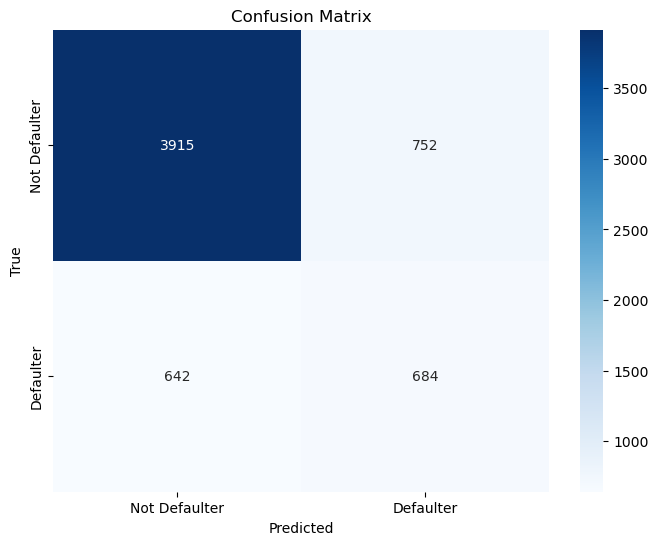

In [56]:
plot_confusion_matrix(y_test,result_gbh['y_pred_test'])

In [57]:
gb_best_params

{'learning_rate': 0.081563871347858,
 'loss': 'exponential',
 'max_depth': 9,
 'max_features': 1.0,
 'min_samples_leaf': 6,
 'min_samples_split': 18,
 'n_estimators': 191}

## grid for gradient


In [91]:
from sklearn.model_selection import train_test_split

In [38]:
''''
# Assuming you have X_preprocessed_train and y_smote as your training data
# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed_train, y_smote, test_size=0.2, random_state=42)

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Create a GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object
grid_gb_clf = GridSearchCV(gb_clf, param_grid, scoring='accuracy', n_jobs=-1, verbose=4, cv=5)

# Fit the model to the training data
grid_gb_clf.fit(X_train, y_train)

# Get the best estimator and best parameters
optimized_clf = grid_gb_clf.best_estimator_
optimized_params = grid_gb_clf.best_params_
''''

SyntaxError: unterminated string literal (detected at line 29) (2940714234.py, line 29)

In [93]:
grid_gb_clf.best_params_


{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 0.8}

In [95]:
gb_grid_model = GradientBoostingClassifier()
hyper_parameter = optimized_params
result_gbh_grid = evaluate_model(model=gb_grid_model, X_train=X_preprocessed_train, X_test=X_preprocessed_test, y_train=y_smote, y_test=y_test, hyperparameters=hyper_parameter)
result_gbh_grid

{'Train Accuracy': 0.782033426183844,
 'Train Precision': 0.8155718053224646,
 'Train Recall': 0.7288943646882365,
 'Train F1 Score': 0.7698008599230595,
 'Train ROC AUC Score': 0.782033426183844,
 'Test Accuracy': 0.769731353245453,
 'Test Precision': 0.4809052333804809,
 'Test Recall': 0.5128205128205128,
 'Test F1 Score': 0.49635036496350365,
 'Test ROC AUC Score': 0.6777730162131276,
 'y_pred_train': array([0, 1, 0, ..., 1, 0, 0], dtype=int64),
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 1], dtype=int64),
 'Trained_model': GradientBoostingClassifier()}

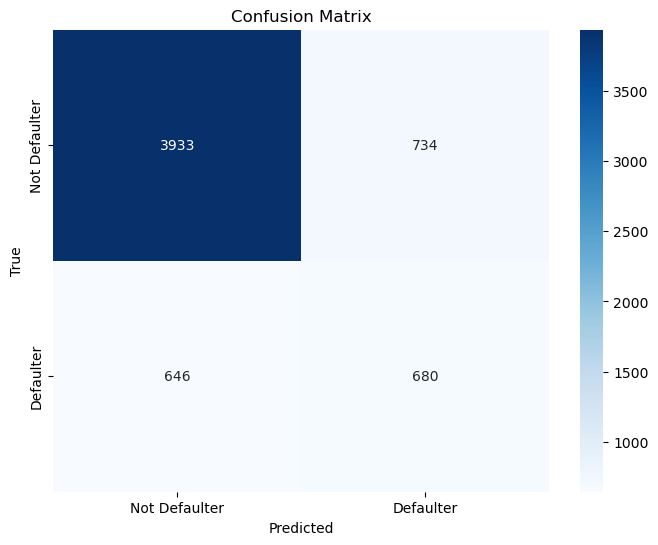

In [101]:
plot_confusion_matrix(y_test,result_gbh_grid['y_pred_test'])

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming result_lrh, result_rfh, and result_gbh are your model results

fpr1, tpr1, _ = roc_curve(y_test, result_lrh['y_pred_test'])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, result_rfh['y_pred_test'])
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, result_gbh['y_pred_test'])
roc_auc3 = auc(fpr3, tpr3)

# Repeat the above steps for model3 and its ROC curve and AUC score
plt.figure(figsize=(10, 6))

# Using a color palette for better distinction
colors = ['b', 'r', 'g']

plt.plot(fpr1, tpr1, color=colors[0], lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color=colors[1], lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color=colors[2], lw=2, label=f'Gradient Boost (AUC = {roc_auc3:.2f})') 

# Plot the ROC curve for model3 with its AUC score

plt.plot([0, 1], [0, 1], color='gray', lw=2)

# Adding grid lines for better readability
plt.grid(True, alpha=0.7)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


NameError: name 'result_lrh' is not defined

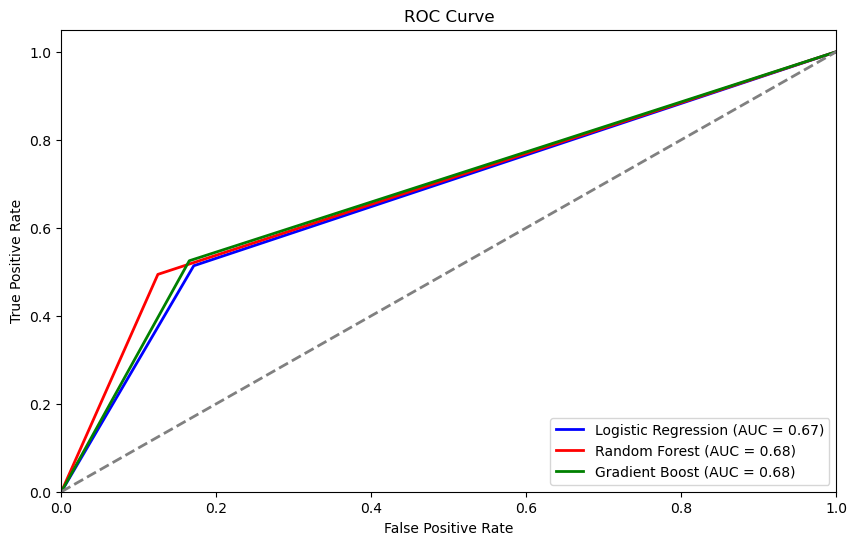

In [83]:
fpr1, tpr1, _ = roc_curve(y_test, result_lrh['y_pred_test'])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, result_rfh['y_pred_test'])
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, result_gbh['y_pred_test'])
roc_auc3 = auc(fpr3, tpr3)

# Repeat the above steps for model3 and its ROC curve and AUC score
plt.figure(figsize=(10, 6))

plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='g', lw=2, label=f'Gradient Boost (AUC = {roc_auc3:.2f})')

# Plot the ROC curve for model3 with its AUC score

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [59]:
import dill
model = result_gbh['Trained_model']
pipeline = pipeline1
data = {"model": model, "pipeline":pipeline}
with open ('model_pipeline_object.joblib','wb') as file:
    dill.dump(data, file)